# Sales Analysis using Python Pandas & Python Matplotlib

## OBJECTIVE

In this project, I use Python Pandas and Python Matplotlib to answer several business questions of 12-month sales data which contains information regarding product sold, quantity, price and address.

### Business questions to be addressed:

- Which products are the best sellers?
- Which are the top 10 products with highest sales?
- Which city sold the most products?
- What is the sales trend during 12 months & which month of the year has the highest sales?
- Which day of the week has the highest sales amount?
- What is the company sales by product and city?
- Which products often sold together?
- Based on the order time, what is the best time to display product advertisement to attract customers?
- What is the sales distribution by month?
- What is the sales distribution by product?
- What is the quantity distribution by month?
- What is the quantity distribution by product?

### Importing necessary libraries

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

### Concatenate 12 csv files of sales data into 1 dataframe

In [75]:
path = r"/Users/huongtran/Desktop/Pandas_Sales_Analysis/Sales_Data"
all_files = glob.glob(path + "/*.csv")

# Create a list of dataframe of each file
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

# Concatenate into 1 dataframe
sales_data = pd.concat(li, axis=0, ignore_index=True)

In [76]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Data Transformation

In [94]:
# Remove duplicate headers in the dataframe
sales_data = sales_data[sales_data['Order Date'] != 'Order Date']

In [95]:
# Convert Order Date column to datetime data type
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Extract month from Order Date as a new column
sales_data['Month'] = sales_data['Order Date'].dt.month

In [79]:
# Check null values in the dataframe
sales_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

In [84]:
# Drop null values in columns
sales_data.dropna(inplace=True)
sales_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [86]:
# Change data type of columns
sales_data['Month'] = sales_data['Month'].astype(int)
sales_data['Quantity Ordered'] = sales_data['Quantity Ordered'].astype(int)
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'], errors = 'coerce')
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 11.3+ MB


In [88]:
# Create day of week column from Order Date
sales_data['Day of Week'] = sales_data['Order Date'].dt.day_name()
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day of Week
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,Monday
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,Sunday
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,Thursday
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,Sunday
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Wednesday


In [90]:
# Add sales amount column to the dataframe
sales_data['Sales Amount'] = sales_data['Quantity Ordered'] * sales_data['Price Each']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day of Week,Sales Amount
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,Monday,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,Sunday,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,Thursday,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,Sunday,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Wednesday,11.95


In [93]:
# Split Purchase Address column by delimeter
sales_data[['Address', 'City', 'Postal Code']] = sales_data['Purchase Address'].str.split(',', expand=True)

# Delete unnecessary columns for analysis
sales_data.drop(columns=['Address', 'Postal Code', 'Purchase Address'], axis=1, inplace=True)

sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Day of Week,Sales Amount,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,12,Monday,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,12,Sunday,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,12,Thursday,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,12,Sunday,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,12,Wednesday,11.95,Atlanta


### Question 1: Which products are the best sellers?

In [104]:
prod_quant = sales_data.groupby('Product')['Quantity Ordered'].sum().reset_index()
prod_quant = prod_quant.sort_values('Quantity Ordered', ascending=False)
prod_quant.head()

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557


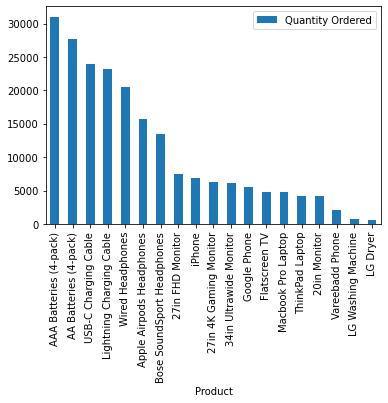

In [106]:
# Plot the result with matplotlib bar chart
prod_quant.plot(x='Product', y='Quantity Ordered', kind='bar')
plt.show()

### Answer 1:
Top 5 products that are best sellers include AAA Batteries, AA Batteries, 